### Student ID: 18195067
### Student Name: Abhijit Sinha

# E-tivity 3: Clustering and Manifold Learning

**Use this notebook to complete Tasks 1 and 2 in E-tivity3.**

### Import Python Modules

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold
from sklearn import cluster
from sklearn import preprocessing

In [26]:
# Load the dataset into pandas dataframe
df = pd.read_csv("loans_dataset_et3.csv")

In [27]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,2483,2466.0,90,180,0
1,4917,0.0,130,360,0
2,4106,0.0,40,180,1
3,3859,3300.0,142,180,1
4,6417,0.0,157,180,1


In [28]:
df.shape

(332, 5)

In [29]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,332.000000,332.000000,332.000000,332.000000,332.000000
mean,5201.093373,1495.508795,140.882530,341.710843,0.978916
std,4584.815491,1982.742932,75.544237,61.651497,0.143882
min,645.000000,0.000000,17.000000,60.000000,0.000000
25%,2912.750000,0.000000,100.000000,360.000000,1.000000
50%,3858.500000,1211.500000,128.000000,360.000000,1.000000
75%,5818.250000,2250.000000,162.000000,360.000000,1.000000
max,39999.000000,20000.000000,600.000000,480.000000,1.000000


# Task 1 (CS5062)
*Cluster loans_dataset_et3.csv with the k-Means clustering algorithm and visualise the clustering. Use an appropriate feature-scaling technique and pick a value of k suggested by MDS and t-SNE visualisations of the dataset.* 

*Experiment with various values of the parameters of k-Means. **Aim at producing a meaningful clustering** that allows you to describe the clusters with words. Write a short conclusion about the characteristics of the clusters (max 250 words).*

### Test:
1. Use an appropriate feature-scaling technique
2. pick a value of k suggested by MDS and t-SNE visualisations of the dataset.
3. Experiment with various values of the parameters of k-Means
4. Aim at producing a meaningful clustering that allows you to describe the clusters with words.

In [30]:
data = np.array(df.values, dtype=float)

In [31]:
data.shape

(332, 5)

In [32]:
# scale the data
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

In [47]:
colors = np.array(['orange', 'blue', 'lime', 'khaki', 'pink', 'green', 'purple', 'maroon', 'aqua'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot

def clustering_scatterplot(points, labels, centers, title):
    # plot the examples, i.e. the data points
    
    plt.figure(figsize=(7,6))
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    plt.title(title)
    plt.legend(loc='best')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

[1 2 3 4 5 6 7 8 9]


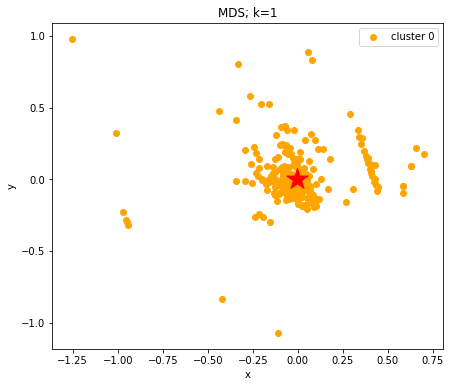

SSE =  27.287863801543914


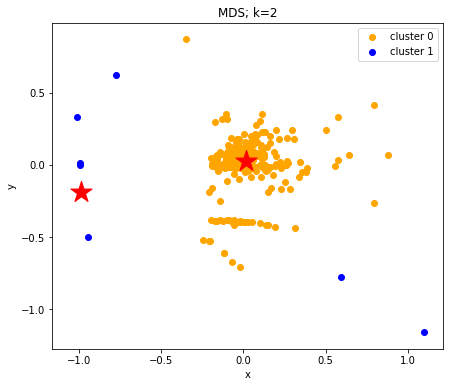

SSE =  20.222308926176684


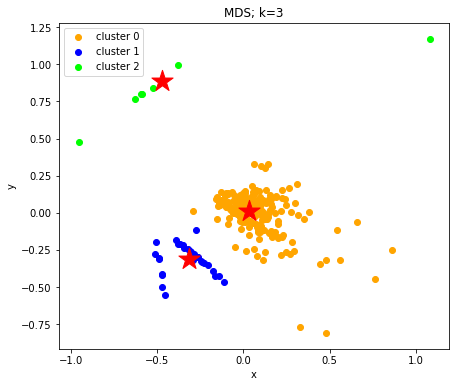

SSE =  14.041065598451198


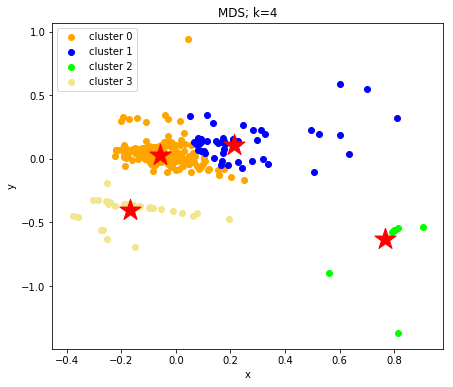

SSE =  10.51051451404549


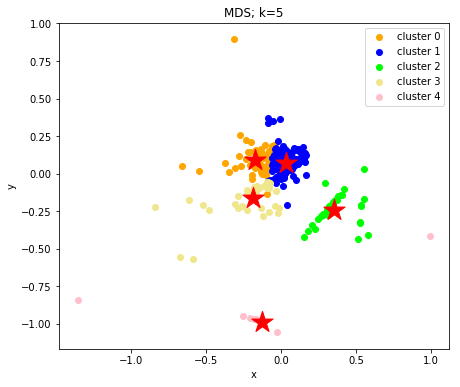

SSE =  9.059462588340399


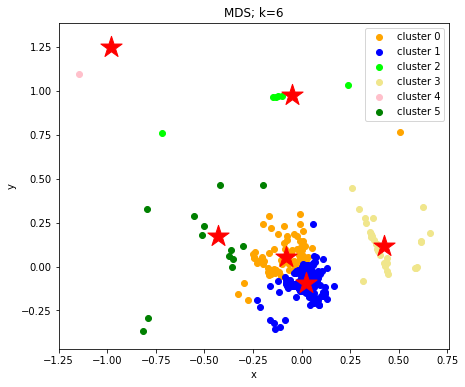

SSE =  7.8046343394971265


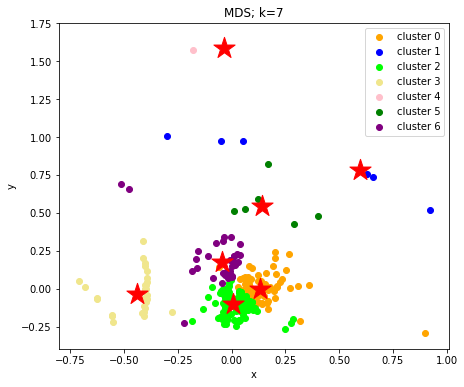

SSE =  6.63268824499657


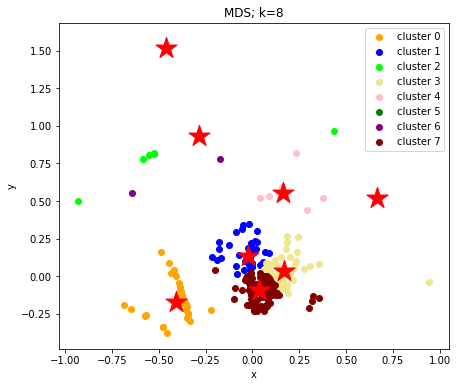

SSE =  5.636022941763049


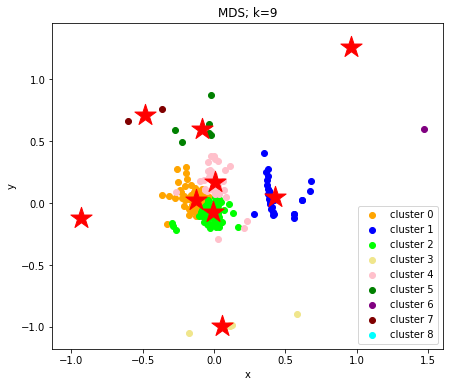

SSE =  4.943675355923766
Wall time: 40.1 s


In [48]:
%%time

max_num_clusters = 10
min_num_clusters = 1

SSE = np.empty(max_num_clusters - min_num_clusters)

# Generate an array consisting of the number of clusters
num_clusters = np.array(range(min_num_clusters, max_num_clusters), dtype="i4")
print(num_clusters)

for i in range(len(num_clusters)):
    
    k = num_clusters[i]
    kmeans = cluster.KMeans(n_clusters=k, n_init=10, max_iter=500).fit(data) # , init="random"
    
    loan_centroid = np.r_[data, kmeans.cluster_centers_]
    XY_mds_coordinates = manifold.MDS(n_components=2).fit_transform(loan_centroid)
    #print("MDS transformation complete")
    
#     # project both the data and the k-Means cluster centers to a 2D space
#     XY_tsne_coordinates = manifold.TSNE(n_components=2).fit_transform(loan_centroid)
#     print("T-SNE transformation complete")

    
    # plot the transformed examples and the centers
    # use the cluster assignment to colour the examples
    # plot the transformed examples and the centers
    # use the cluster assignment to colour the examples
    clustering_scatterplot(points=XY_mds_coordinates[:-k,:], 
                           labels=kmeans.labels_,
                           centers=XY_mds_coordinates[-k:,:], 
                           title='MDS; k={}'.format(k))    
    
#     clustering_scatterplot(points=XY_tsne_coordinates[:-k,:], 
#                            labels=kmeans.labels_,
#                            centers=XY_tsne_coordinates[-k:,:], 
#                            title='TSNE')
    
    SSE[i] = kmeans.inertia_
    print("SSE = ",kmeans.inertia_)


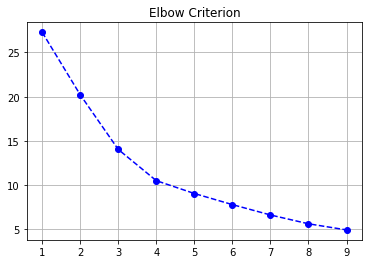

In [52]:
plt.title("Elbow Criterion")
plt.plot(num_clusters, SSE, 'bo--')
plt.grid()
plt.show()

Usually an 'elbow' is apparent where the reduction in sum of square errors levels off as the number of clusters increses. This indicates that increasing the number of clusters does not improve the clustering. Hence an optimal number of clusters can be identified